### Run in collab
<a href="https://colab.research.google.com/github/racousin/rl_introduction/blob/master/notebooks/2_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install swig==4.2.1
!apt-get install xvfb
!pip install box2d-py==2.3.8
!pip install gymnasium[box2d,atari,accept-rom-license]==0.29.1
!pip install pyvirtualdisplay==3.0
!pip install opencv-python-headless
!pip install imageio imageio-ffmpeg
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import gymnasium as gym
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from rl_introduction.rl_introduction.tools import Agent, plot_values_lake
env = gym.make('FrozenLake-v1')

# 2_Dynamic_Programming

### Objective
Before diving deeper into Reinforcement Learning (RL), it's essential to understand how to compute the best agent's strategy when the model of the environment is perfectly known, referred to as the Markov Decision Process (MDP). In this exercise, we will use the FrozenLake environment as our example to solve an MDP.



In [9]:
from rl_introduction.rl_introduction.render_colab import exp_render
exp_render({"name":'FrozenLake-v1', "fps":2, "nb_step":30})

### Understanding the Environment


In [10]:
env = gym.make('FrozenLake-v1')

#### 1) Environment Transition Model and Policy
**Question 1:** Environment Description

Describe the **observation space** and **action space** of the FrozenLake environment.

**Question 2:** Transition Model

Describe the **Transistion Model** `env.P[state][action]`. Is the transition model of the environment stochastic?

**Exercise 1:** Implement a Random Policy

 Write a **random policy** to perform experiments in the FrozenLake environment. Then run the code bellow.

#### 1) Environment Transition Model and Policy
**Question 1:** Environment Description

**Observation Space:** The observation space in the FrozenLake environment is discrete and represents the current position of the agent in a grid. If the grid is 4×4, there are 16 possible states (from 0 to 15) that the agent can observe.

**Action Space:** The action space is also discrete with four possible actions: LEFT (0), DOWN (1), RIGHT (2), and UP (3). These actions determine the direction in which the agent attempts to move on the grid.

**Question 2:** Transition Model

P(s'|state,action), s', reward, done

env.P[0][1]
[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]
We see here that there is a  1/3  probability falling in the hole in state 5 (and finish the episode).

**Exercise 1:** Implement a Random Policy

 Write a **random policy** to perform experiments in the FrozenLake environment. Then run the code bellow.

In [ ]:
# Random Policy Implementation
policy =

In [38]:
# Random Policy Implementation
policy =  np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n

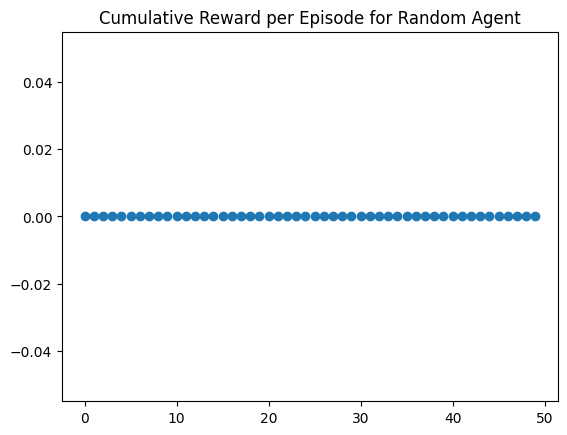

In [60]:
class MyAgent(Agent):
    def __init__(self, env, policy):
        super().__init__(env)
        self.policy = policy
    def act(self, state):
        action = np.random.choice(np.arange(self.env.action_space.n),p=self.policy[state])
        return action

my_agent = MyAgent(env, policy)

# Experiment Running Function
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()[0]
        done = False
        rews = []
        while not done:
            action = agent.act(state)
            state, reward, done, _, _ = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
    return rewards

# Running the experiment
rewards = run_experiment_episode(env, my_agent, 50)
plt.plot(rewards, 'o')
plt.title('Cumulative Reward per Episode for Random Agent')
plt.show()

## 2a) Policy Evaluation - Value Function

To evaluate the value function of a policy, we use the iterative approach


$V_{k+1}(s) = \mathbb{E}_\pi [r + \gamma V_k(s_{t+1}) | S_t = s] $.

$(V_k)_{k\in \mathbb{N}}$ converges to $V_\pi$.

**Exercise 1:** Policy Evaluation Implementation

Complete the Python function below to evaluate the given policy using the iterative approach described above.


- Iterate over all states in the environment within the outer loop.
- For each state, compute the expected return by considering all possible actions and their probabilities under the current policy.
- Use the transition model (env.P[s][a]) to access the probabilities of next states and rewards for each action.
- Update the value function until the maximum change across all states is less than θ, indicating convergence.

In [ ]:
#TODO: write the value evaluation from Policy, reward and transition model
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.observation_space.n) # initialization
    #complete here
    return V

In [40]:
#Done: write the value evaluation from Policy, reward and transition model
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.observation_space.n) # initialization
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                # action_prob is $\pi(a/s)$
                for prob, next_state, reward, done in env.P[s][a]:
                    # prob is $P(next_state, reward/s,a)$
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s]-Vs))
            V[s] = Vs
        if delta < theta: # condition of convergence
            break
    return V

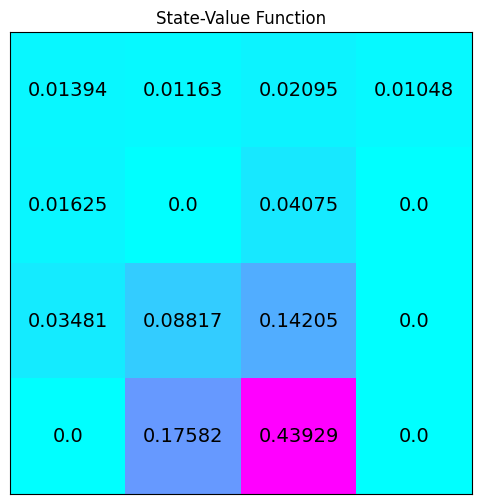

In [42]:
# evaluate the policy
policy =  np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
V = policy_evaluation(env, policy)
plot_values_lake(V)

## 2b) Policy Evaluation - Action Value Function

The action-value function Q(s,a) is computed as the expected return of taking an action a in state s, which includes the immediate reward plus the discounted future value as per the state transition probabilities. Mathematically, it is expressed as:

\begin{aligned}
Q(s, a)
&= \sum_{s'} [r_{t+1} + \gamma V(s')] P(S_{t+1}=s'|S_t=s,A_t=a)
\end{aligned}

**Exercise 2:** Action Value Function

compute the action value function from the value function
- For each state, compute the q(s) action value using reward and transition model
- Iterate over all states to get the action value function

In [ ]:
#TODO: write the q evaluation from the value function, reward and transition model
def q_from_v(env, V, s, gamma=1):
    #complete here
    return q

In [43]:
#Done: write the q evaluation from the value function, reward and transition model
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.action_space.n)
    for a in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])
    return q

In [44]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
for s in range(env.observation_space.n):
    Q[s] = q_from_v(env, V, s)
print("Action-Value Function:")
print(Q)

Action-Value Function:
[[0.0147094  0.01393978 0.01393978 0.01317015]
 [0.00852356 0.01163091 0.0108613  0.01550788]
 [0.02444514 0.02095298 0.02406033 0.01435346]
 [0.01047649 0.01047649 0.00698432 0.01396865]
 [0.02166487 0.01701828 0.01624865 0.01006281]
 [0.         0.         0.         0.        ]
 [0.05433538 0.04735105 0.05433538 0.00698432]
 [0.         0.         0.         0.        ]
 [0.01701828 0.04099204 0.03480619 0.04640826]
 [0.07020885 0.11755991 0.10595784 0.05895312]
 [0.18940421 0.17582037 0.16001424 0.04297382]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08799677 0.20503718 0.23442716 0.17582037]
 [0.25238823 0.53837051 0.52711478 0.43929118]
 [0.         0.         0.         0.        ]]


## 3) Policy Improvement

The policy improvement step uses the action-value function Q to make the policy greedy, thereby ensuring the policy selects the action with the highest value in each state. Mathematically, this is represented as: $\pi'(.|s) = \arg\max_a Q_\pi(a,s)$.

**Exercise 1:** Choosing the Best Action

Complete the `best_action_from_Q` function bellow to determine the best action for a state s from the action-value function Q.

**Exercise 2:**

Complete the `policy_improvement` function bellow  to generate a new, improved policy $\pi'$ based on the value function $V$ and the best_action_from_Q.

Exercise 3:
E Evaluate the value function of the new, improved policy $\pi'$and compare it to the original policy. Better?

In [37]:
#TODO: choose the best action in a state s from Q, What the best direction/action on state 1?
def best_action_from_Q(env, Q, s):
  # Complete
  return best_a
print(f"best direction/action on state 1: {best_action_from_Q(env, Q, 1)}")

NameError: name 'Q' is not defined

In [45]:
#Done: choose the best action in a state s from Q, What the best direction/action on state 1
def best_action_from_Q(env, Q, s):
  q = Q[s]
  best_a = np.argwhere(q==np.max(q)).flatten()
  return best_a
print(f"best direction/action on state 1: {best_action_from_Q(env, Q, 1)}")

best direction/action on state 1: [3]


In [ ]:
#TODO: write the policy improvment update step
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    #complete here
    return policy

In [46]:
#Done: write the policy improvment update step
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for s in range(env.observation_space.n):
        q = q_from_v(env, V, s, gamma)
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.action_space.n)[i] for i in best_a], axis=0)/len(best_a)
    return policy

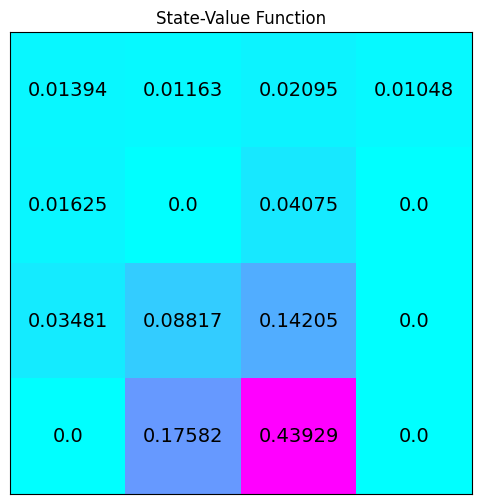

In [47]:
# evaluate the policy
policy =  np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
V = policy_evaluation(env, policy)

plot_values_lake(V)

In [ ]:
#TODO: Improve and evaluate the policy

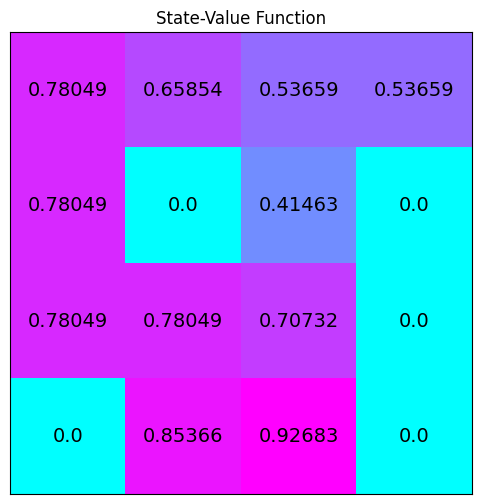

In [48]:
#Done: Improve and evaluate the policy
new_policy = policy_improvement(env, V, gamma=1)

# evaluate the policy
new_V = policy_evaluation(env, new_policy)

plot_values_lake(new_V)

## 4) Policy iteration

Policy iteration alternates between evaluating a policy and improving it until convergence.

$\pi_0 \xrightarrow[]{\text{evaluation}} V_{\pi_0} \xrightarrow[]{\text{improve}}
\pi_1 \xrightarrow[]{\text{evaluation}} V_{\pi_1} \xrightarrow[]{\text{improve}}
\pi_2 \xrightarrow[]{\text{evaluation}} \dots \xrightarrow[]{\text{improve}}
\pi_* \xrightarrow[]{\text{evaluation}} V_*$

- Policy Evaluation: Compute the value function $V_{\pi}$ for the current policy.
- Policy Improvement: Generate a new policy $\pi'$ that is greedy with respect to $V_{\pi}$.

**Exercise 1:**
Complete the policy iteration function below, which iteratively evaluates and improves a policy until it converges to the optimal policy.

In [ ]:
#TODO: write the policy iteration
def policy_iteration(env):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n # init a random policy
    # complete here
    return policy, V

In [49]:
#Done: write the policy iteration
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    while True:
        V = policy_evaluation(env, policy, gamma, theta)
        plot_values_lake(V)
        new_policy = policy_improvement(env, V)
        if np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy))) < theta*1e2:
            break;
        policy = copy.copy(new_policy)
    plot_values_lake(V)
    return policy, V

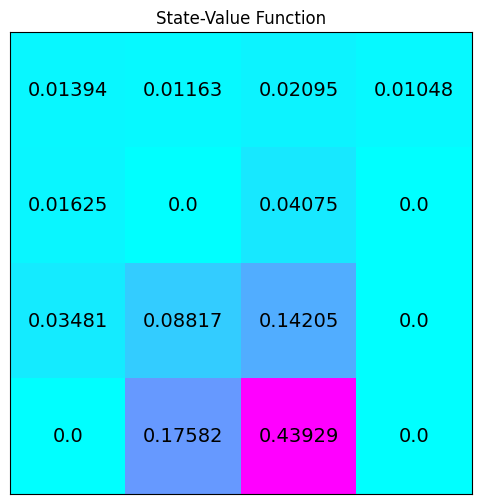

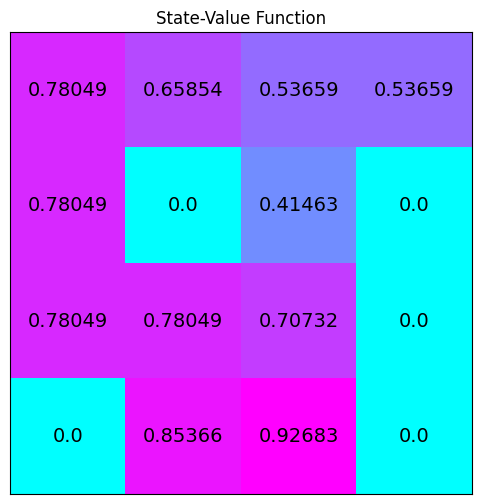

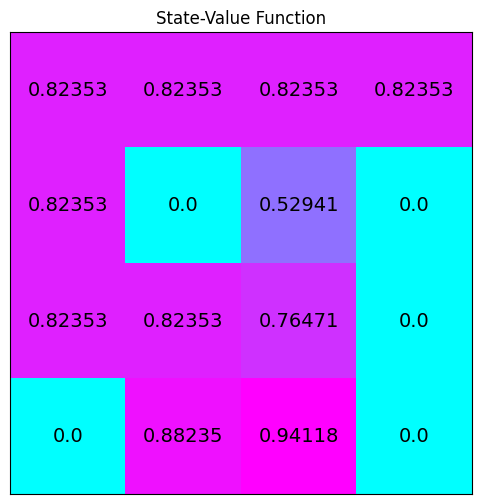

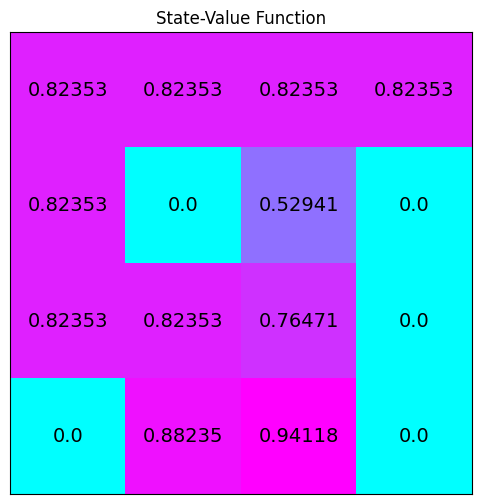


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



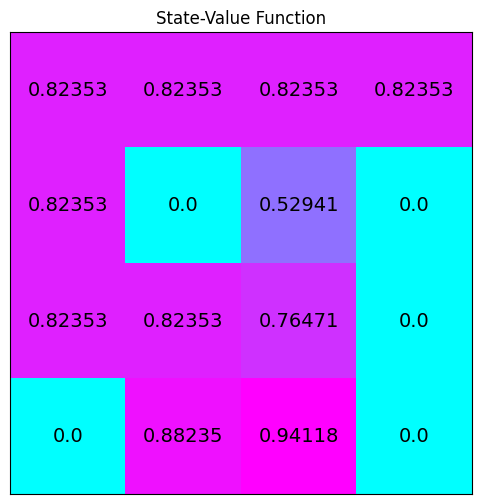

In [50]:

# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values_lake(V_pi)

In [ ]:
policy_pi

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
V_pi.sum()

8.88235133583077

## 5) Run experiments (optimal policy vs random)

**Last Exercise:** Evaluate the effectiveness of the optimal policy obtained from policy iteration compared to a random policy. compare the cumulative rewards obtained by an agent using a random policy versus an agent using the optimal policy over 50 episodes. Use the run_experiment_episode function to collect the cumulative rewards for each policy and visualize the results.

In [ ]:
#TODO: eval best Policy with run_experiment_episode

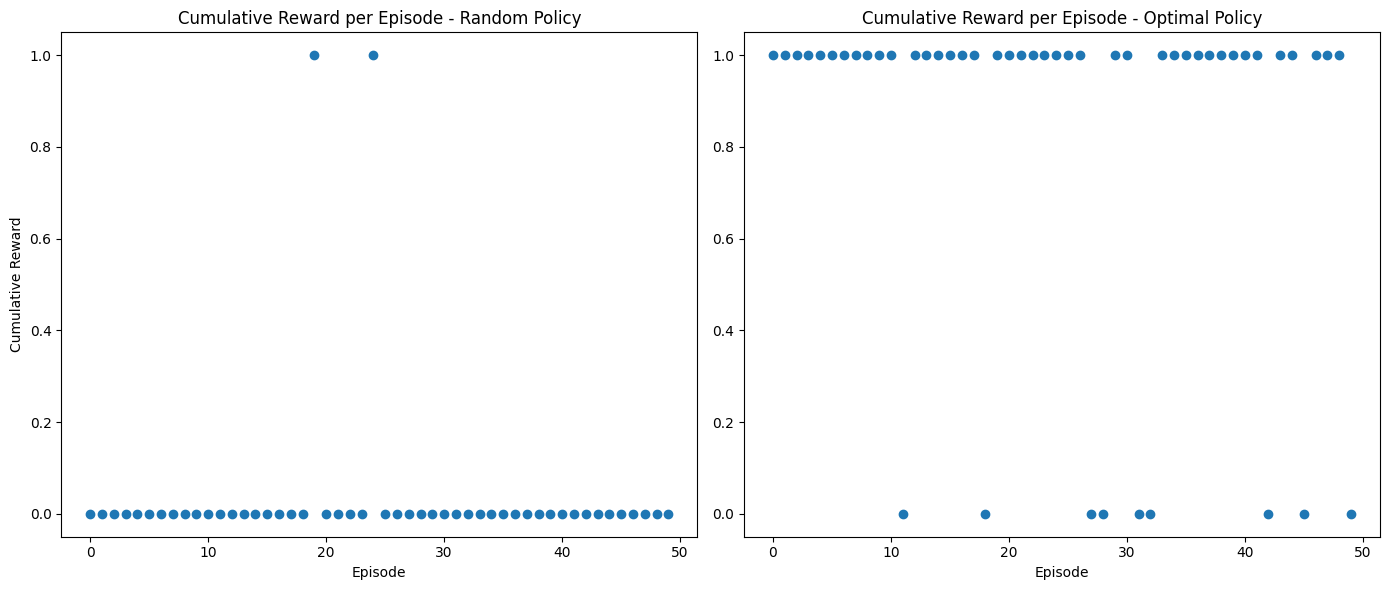

In [61]:
# Assume 'env' is the environment, 'policy_random' is a random policy, and 'policy_optimal' is the optimal policy obtained from policy iteration

# Initialize agents with random and optimal policies
agent_random = MyAgent(env, policy)
agent_optimal = MyAgent(env, policy_pi)

# Run experiments for each agent
rewards_random = run_experiment_episode(env, agent_random, 50)
rewards_optimal = run_experiment_episode(env, agent_optimal, 50)

# Visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(rewards_random, 'o')
plt.title('Cumulative Reward per Episode - Random Policy')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

plt.subplot(1, 2, 2)
plt.plot(rewards_optimal, 'o')
plt.title('Cumulative Reward per Episode - Optimal Policy')
plt.xlabel('Episode')

plt.tight_layout()
plt.show()


In [ ]:
exp_render({"name":'FrozenLake-v1', "fps":2, "nb_step":30, "agent": MyAgent(env, agent_optimal)})

## 4) Value iteration

Value iteration consists in directly compute the best policy evaluation.
We initialize $V_0$ arbitrarly. And we update it using:

$V_{k+1}(s) = \mathbb{E}_\pi [r + \gamma \max_a Q_k(s_{t+1},a) | S_t = s] $ (2).
$\forall s$, $V_{\pi^*}(s)$ is a fix point for (2), so if $(V_k)_{k\in \mathbb{N}}$ converges, it converges to $V_{\pi^*}$.

In [ ]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = V[s]
            V[s] = max(q_from_v(env, V, s, gamma))
            delta = max(delta,abs(V[s]-v))
        if delta < theta:
            break
    policy = policy_improvement(env, V, gamma)
    return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



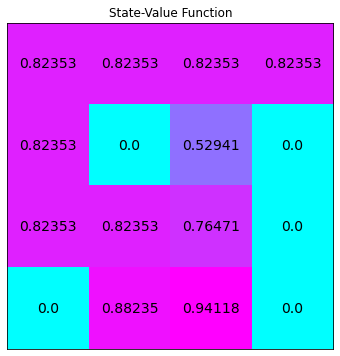

In [ ]:
policy_vi, V_vi = value_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
plot_values_lake(V_vi)

In [ ]:
V_vi.sum()

8.882351322605881